# Exploratory Data Analysis
## Remote Work and Stress Prediction
This notebook explores the dataset and identifies patterns, feature distributions, and relationships with the target variable (Stress_Level).

In [1]:
#importing all the libraries needed for the exploration 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the csv file and basic exploration
df = pd.read_csv("../data/Impact_of_Remote_Work_on_Mental_Health.csv")
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## 1) Dataset overview
We inspect dimensions, column names, data types, and summary statistics to understand the structure of the dataset.

In [3]:
print(f"Rows and Columns: {df.shape}")

Rows and Columns: (5000, 20)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

In [5]:
print(f"Name of columns: \n{df.columns}")

df.describe(include="all")

Name of columns: 
Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
count,5000,5000.000000,5000,5000,5000,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000,3804,5000,5000,5000.000000,5000,5000.000000,3371,5000,5000
unique,5000,NaN,4,7,7,NaN,3,NaN,NaN,NaN,3,3,2,3,NaN,3,NaN,2,3,6
top,EMP0001,NaN,Female,Project Manager,Finance,NaN,Remote,NaN,NaN,NaN,High,Burnout,No,Decrease,NaN,Unsatisfied,NaN,Weekly,Good,Oceania
freq,1,NaN,1274,738,747,NaN,1714,NaN,NaN,NaN,1686,1280,2553,1737,NaN,1677,NaN,1755,1687,867
mean,NaN,40.995000,NaN,NaN,NaN,17.810200,NaN,39.614600,7.559000,2.984200,NaN,NaN,NaN,NaN,2.993800,NaN,3.007800,NaN,NaN,NaN
std,NaN,11.296021,NaN,NaN,NaN,10.020412,NaN,11.860194,4.636121,1.410513,NaN,NaN,NaN,NaN,1.394615,NaN,1.399046,NaN,NaN,NaN
min,NaN,22.000000,NaN,NaN,NaN,1.000000,NaN,20.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,31.000000,NaN,NaN,NaN,9.000000,NaN,29.000000,4.000000,2.000000,NaN,NaN,NaN,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN
50%,NaN,41.000000,NaN,NaN,NaN,18.000000,NaN,40.000000,8.000000,3.000000,NaN,NaN,NaN,NaN,3.000000,NaN,3.000000,NaN,NaN,NaN
75%,NaN,51.000000,NaN,NaN,NaN,26.000000,NaN,50.000000,12.000000,4.000000,NaN,NaN,NaN,NaN,4.000000,NaN,4.000000,NaN,NaN,NaN


The dataset contains 5000 observations and 20 variables. The outcome variable is Stress_Level, which is categorical with three levels: Low, Medium, and High.


## 2) Target variable: Stress_Level
We check class distribution to confirm whether class imbalance could affect modelling.


In [6]:
#examining the target distribution to explore the imbalance
df["Stress_Level"].value_counts(normalize=True)

Stress_Level
High      0.3372
Medium    0.3338
Low       0.3290
Name: proportion, dtype: float64

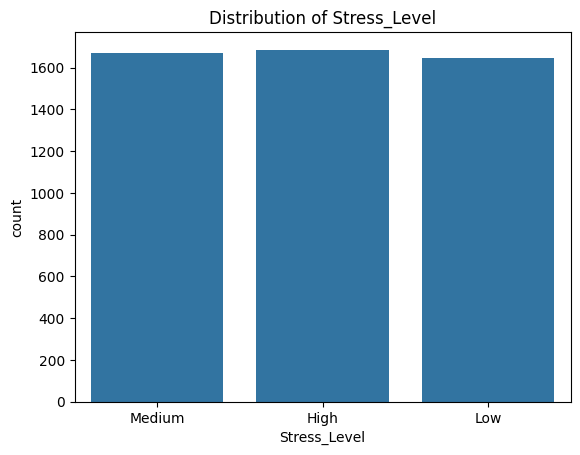

In [7]:
# Visualise the class distribution

sns.countplot(data=df, x="Stress_Level")
plt.title("Distribution of Stress_Level")
plt.show()

## 3) Missing values
We check missingness to decide whether imputation or row/column removal is needed.


In [8]:
# Identify missing values per column to inform preprocessing decisions
df.isna().sum()

Employee_ID                             0
Age                                     0
Gender                                  0
Job_Role                                0
Industry                                0
Years_of_Experience                     0
Work_Location                           0
Hours_Worked_Per_Week                   0
Number_of_Virtual_Meetings              0
Work_Life_Balance_Rating                0
Stress_Level                            0
Mental_Health_Condition              1196
Access_to_Mental_Health_Resources       0
Productivity_Change                     0
Social_Isolation_Rating                 0
Satisfaction_with_Remote_Work           0
Company_Support_for_Remote_Work         0
Physical_Activity                    1629
Sleep_Quality                           0
Region                                  0
dtype: int64

### Missing values
Most variables have no missing values. However, *Mental_Health_Condition* and *Physical_Activity* contain substantial missingness. These variables may require careful treatment (e.g., dropping, imputing, or excluding if considered downstream of stress) to avoid bias or leakage during modelling.


## 4) Feature exploration (numeric vs Stress_Level)
We explore numeric predictors against the target to see whether patterns exist.


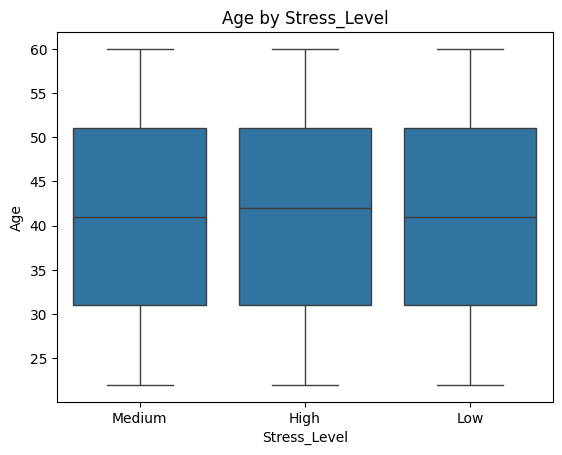

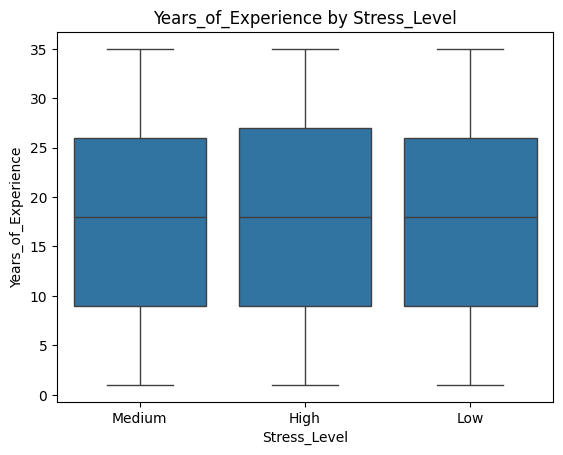

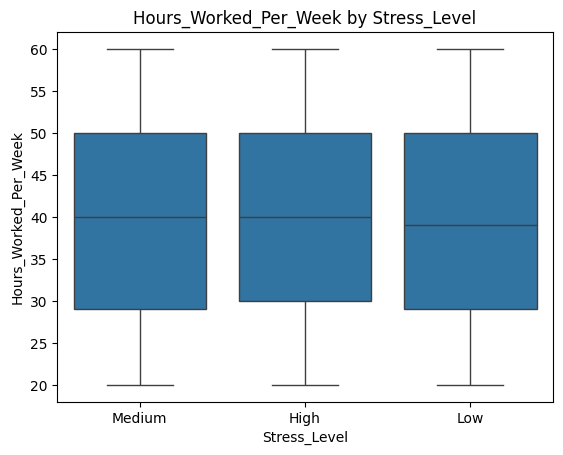

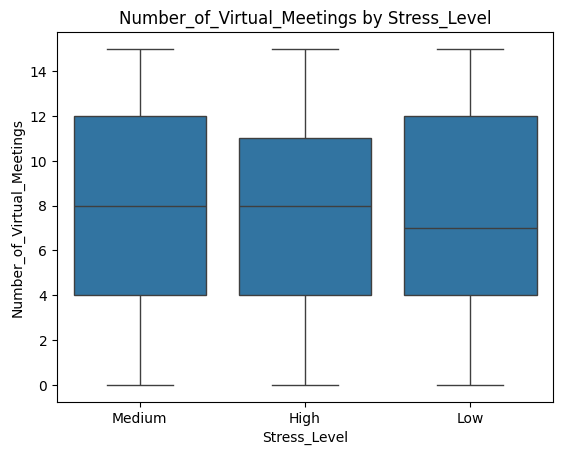

In [9]:
# Compare numeric predictors across stress levels to identify visible patterns

num_cols = ["Age", "Years_of_Experience", "Hours_Worked_Per_Week", "Number_of_Virtual_Meetings"]

for col in num_cols:
    sns.boxplot(data=df, x="Stress_Level", y=col)
    plt.title(f"{col} by Stress_Level")
    plt.show()


### Numeric predictors
The numeric variables show substantial overlap across stress categories. Any differences appear modest rather than clearly separable, suggesting numeric workload measures alone may not strongly predict stress levels.


## 5) Ratings / ordinal-like features vs Stress_Level
These variables may capture subjective work experience and could be strong predictors.


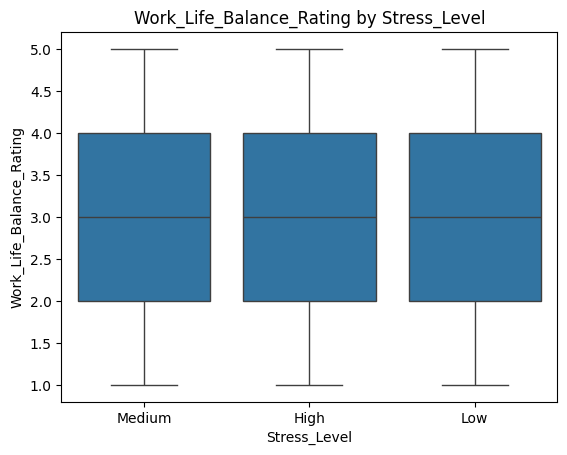

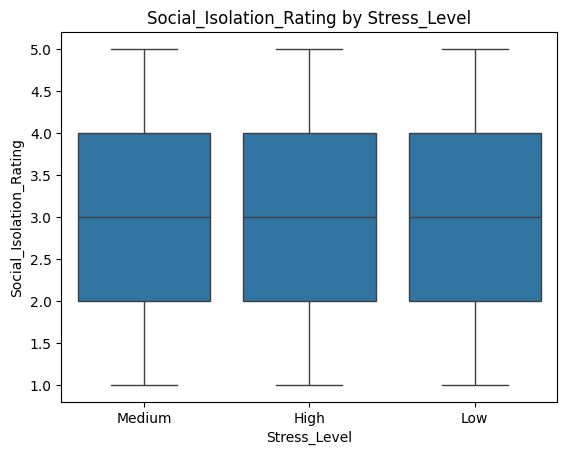

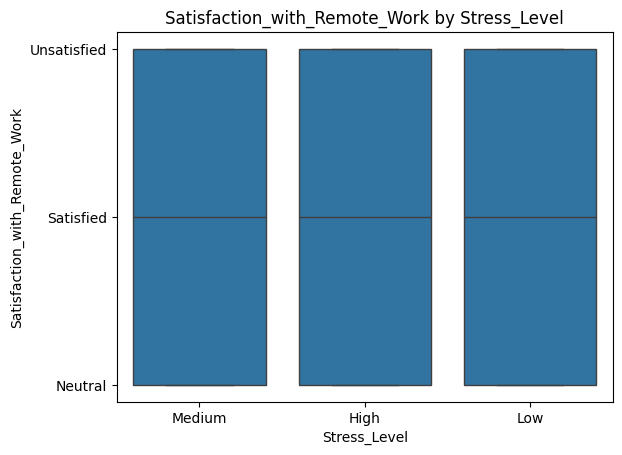

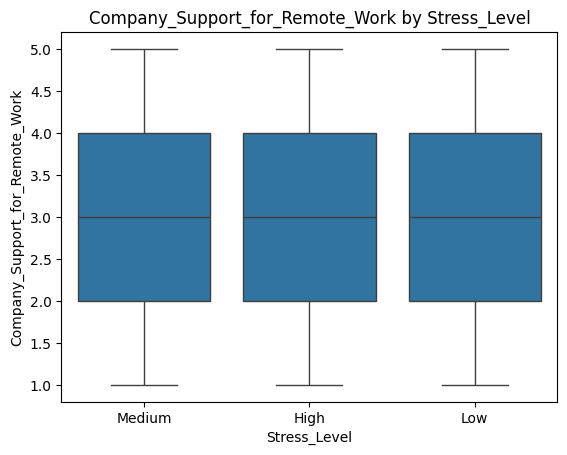

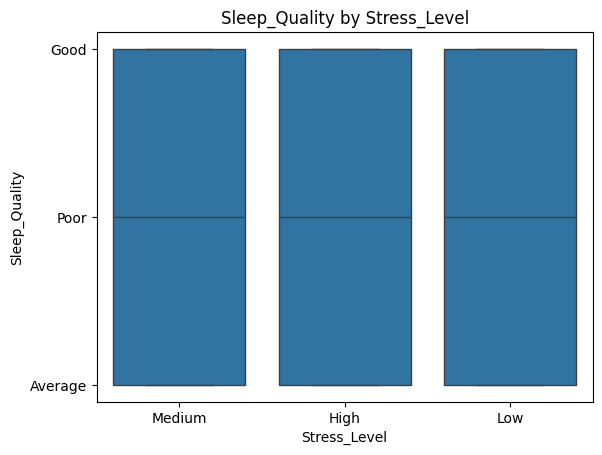

In [10]:
# Explore rating-based predictors (treated as ordinal-like variables)

rating_cols = [
    "Work_Life_Balance_Rating",
    "Social_Isolation_Rating",
    "Satisfaction_with_Remote_Work",
    "Company_Support_for_Remote_Work",
    "Sleep_Quality"
]

for col in rating_cols:
    sns.boxplot(data=df, x="Stress_Level", y=col)
    plt.title(f"{col} by Stress_Level")
    plt.show()

### Rating-based predictors
Subjective rating variables show clearer trends than numeric predictors. Lower work-life balance and sleep quality ratings generally correspond with higher stress, although there is still considerable overlap across groups.


## 6) Categorical predictors vs Stress_Level
We check whether stress differs by role, location, and mental health resource access.


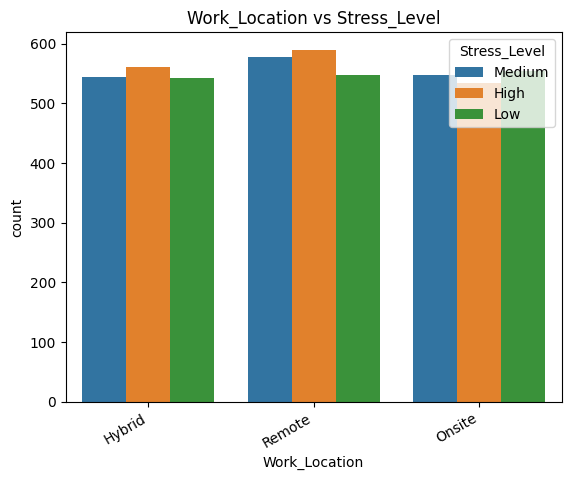

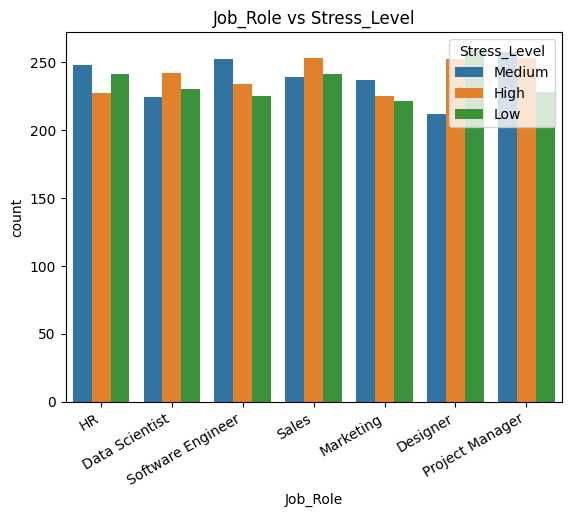

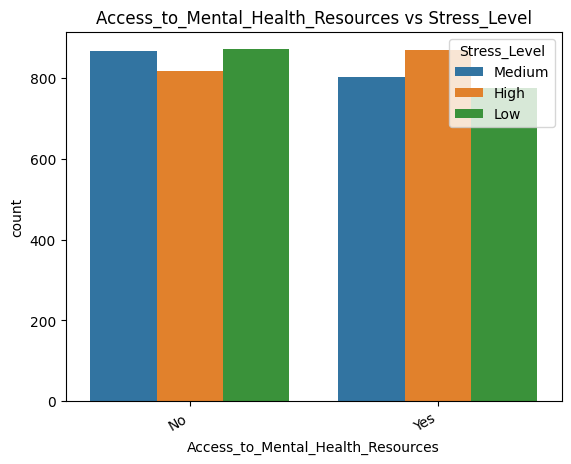

In [11]:
# Explore categorical predictors vs stress (potential group differences)

cat_cols = ["Work_Location", "Job_Role", "Access_to_Mental_Health_Resources"]

for col in cat_cols:
    sns.countplot(data=df, x=col, hue="Stress_Level")
    plt.title(f"{col} vs Stress_Level")
    plt.xticks(rotation=30, ha = "right")
    plt.show()


### Categorical predictors
Categorical variables such as work location and job role do not show strong visual separation across stress categories. Any differences appear small, suggesting limited predictive power from these variables alone.


## 7) Leakage check
We inspect variables that may be outcomes or strongly downstream of stress (and should not be used as predictors).


In [12]:
#verifying these varibales are outcomes of stress and not predictors
df[["Stress_Level", "Mental_Health_Condition", "Productivity_Change"]].head()


,Stress_Level,Mental_Health_Condition,Productivity_Change
0,Medium,Depression,Decrease
1,Medium,Anxiety,Increase
2,Medium,Anxiety,No Change
3,High,Depression,Increase
4,High,NaN,Decrease


## EDA insights
- **Dataset size:** 5,000 observations and 20 variables.
- **Stress_Level class distribution:** Approximately balanced (High ≈ 33.7%, Medium ≈ 33.4%, Low ≈ 32.9%), so class imbalance is not a major concern.
- **Strongest visible numeric patterns:** Numeric features (Age, Years_of_Experience, Hours_Worked_Per_Week, Number_of_Virtual_Meetings) show **substantial overlap** across stress groups; any differences appear **modest** rather than clearly separable.
- **Strongest visible rating patterns:** Subjective rating variables (e.g., Work_Life_Balance_Rating, Social_Isolation_Rating, Satisfaction_with_Remote_Work, Company_Support_for_Remote_Work, Sleep_Quality) show **mild trends** by stress level, but again with **heavy overlap**, suggesting limited predictive separation.
- **Categorical variables with clear separation (if any):** Work_Location, Job_Role, and Access_to_Mental_Health_Resources do not show strong visual separation across stress categories; any differences appear small.
- **Data quality issues:** No missing values in most columns, but **substantial missingness** exists in:
  - Mental_Health_Condition (1,196 missing)
  - Physical_Activity (1,629 missing)

These observations guide feature selection and preprocessing decisions (e.g., whether to drop or impute high-missingness columns) before modelling.
